In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadsajad/concertriccir2")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 12.2k/12.2k [00:00<00:00, 6.19MB/s]

Extracting files...
Path to dataset files: C:\Users\itsam\.cache\kagglehub\datasets\muhammadsajad\concertriccir2\versions\1


In [3]:
df = pd.read_csv('concertriccir2.csv')

In [4]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [9]:
df = df.rename(columns={"7.003345706103683010e-01": "X", "-2.470675778972781789e-01": "Y" , "0.000000000000000000e+00" : "class"})

In [10]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


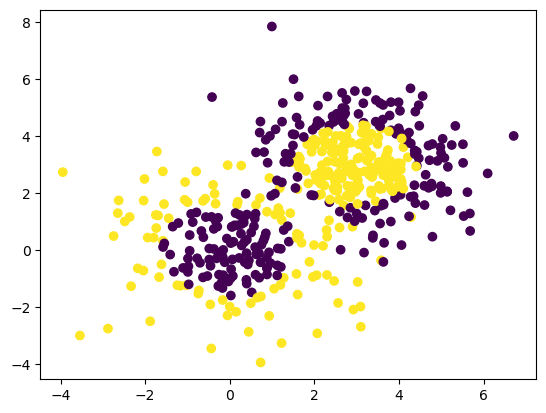

In [11]:
plt.scatter(df['X'] , df['Y'] , c=df['class'])

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [39]:
model = Sequential()

model.add(Dense(2, activation='relu' , input_dim=2))
model.add(Dense(2 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [42]:
history = model.fit(X,y,
                    epochs=200,
                    validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4992 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6936
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6936
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5022 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6938
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5214 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6939
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5105 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6941
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5398 - loss: 0.6926 - val_accuracy: 0.4300 - val_loss: 0.6942
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5180 - loss: 0.6929 - val_accuracy: 0.4300 - val_loss: 0.6944
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5481 - loss: 0.6924 - val_accuracy: 0.4300 - 

### Using Batch Normalisation

In [34]:
model = Sequential()

model.add(Dense(2, activation='relu' , input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2 , activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1 , activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [36]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [37]:
history1 = model.fit(X,y,
                    epochs=200,
                    validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4939 - loss: 0.8430 - val_accuracy: 0.5700 - val_loss: 0.6854
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5017 - loss: 0.8112 - val_accuracy: 0.5300 - val_loss: 0.6881
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5183 - loss: 0.8158 - val_accuracy: 0.4600 - val_loss: 0.6900
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5431 - loss: 0.7602 - val_accuracy: 0.4500 - val_loss: 0.6906
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5056 - loss: 0.8054 - val_accuracy: 0.4600 - val_loss: 0.6922
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5126 - loss: 0.7794 - val_accuracy: 0.4800 - val_loss: 0.6927
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4897 - loss: 0.7755 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5159 - loss: 0.7611 - val_accuracy: 0.4900 - 

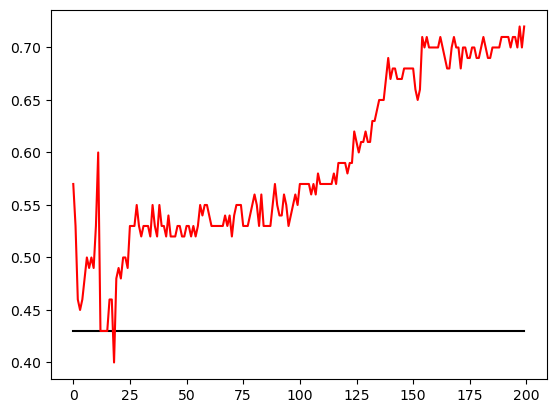

In [43]:
plt.plot(history.history['val_accuracy'], color='black')
plt.plot(history1.history['val_accuracy'], color='red')